# AM207 Homework 1

##### Data: wine_quality_missing.csv

**Harvard University**<br>
**Fall 2018**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Saturday, September 15th, 2018 at 11:59pm



**Instructions:**

- Upload your final answers as well as your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.


In [1]:
import numpy as np
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm
import pandas as pd
%matplotlib inline

## Question 1: Don't Be Sensitive, We're Looking For False Positivity

**Coding not required**

As the U.S. aims to increase early identification and treatment of people with HIV, a greater focus has been placed on determining the accuracy of HIV tests in real-world settings in order to better identify individuals during the early (acute) stages of infection when transmission risk is especially high.  In order to quantify this, researchers from the University of California, San Francisco conducted a review of over 21,234 HIV tests given between the years 2003 and 2008 in some of the city's highest prevalence populations.  Two of the tests included in the study -- the OraQuick Advance Blood Rapid Antibody Test (a 3rd generation fingerstick blood test we'll henceforth call the **BRT**) and the OraQuick Advance Saliva Rapid Antibody Test (a 3rd generation saliva test we'll henceforth call the **SRT**) -- can be considered Rapidly Administered tests.  According to Wikipedia, the overall prevalence of adult HIV in the United States is 0.3%

You and your partner decide to undergo tests for HIV and the two of you are administered the SRT at an HIV screening clinic.  You're aware that the test you've been administered (one of the tests featured in the study) has a sensitivity (true positive rate) of 86.6% and a specificity (true negative rate) of 98.6%.

1.1. In the unfortunate event that your partner tests positive what is the probability that he/she has HIV?

1.2. Should you be concerned enough to ask for further testing or treatment for your partner?  Justify your answer quantitatively.

1.3. The medical staff at the screening clinic decides to independently administer the BRT as it is the only other test they can administer on site.  Based on the UCSF study above, you're aware that this test has a sensitivity (true positive rate) of 91.9% and a specificity of 99.6%.  What is the probability that your partner has the HIV if both tests come up positive (Make the assumption that the independent administration means that the tests are independent of each other)?

It turns out the screening clinic didn't have the second test and you and your partner were only able to be administered the SRT. However, on your way home you're reminded that your partner has spent almost all his/her life in the Bahamas where the prevalence of adult HIV is 3.3%.

1.4. What is the probability that your Bahamian partner has HIV given that he/she received a positive test result on the SRT?

1.5. How does the new information quantifiably affect your decision of whether you should  be concerned enough to ask for treatment or testing for your partner?

*Make sure to justify your decisions using your calculations.*

**Solution**:

<div class="answer-separator">
------------------------
</div>

<h4>1.1. In the unfortunate event that your partner tests positive what is the probability that he/she has HIV?</h4>

<div class="answer">

<br>
Let $H$ be the event that your partner has HIV and let $S$ be the event that the SRT test returns a positive result. The probability that your partner has HIV given that the test is positive $P(H = 1|S = 1)$ can be found using Bayes' theorem.

\begin{equation}
P(H = 1|S = 1) = \frac{P(S = 1|H = 1)P(H = 1)}{P(S = 1|H = 1)P(H = 1) + P(S = 1|H = 0)P(H = 0)}
\end{equation}

We know from Wikipedia that the probability of being HIV positive $P(H=1) = 0.003$ and, equivalently, $P(H=0) = 0.97$. The probability $P(S = 1|H = 1)$ is the true positive rate or the specificity which we know is $0.866$. The probability $P(S = 1|H = 0) = 1 - P(S = 0|H = 0) = 1 - 0.986 = 0.014$.


Hence,

\begin{align}
P(H = 1|S = 1) &= \frac{(0.866)(0.003)}{(0.866)(0.003) + (0.014)(0.997)} \\
    &= 0.157
\end{align}
</div>

In [4]:
(0.866*0.003)/(0.866*0.003 + 0.014*0.997)

0.15692196182652815

<div class="answer-separator">
------------------------
</div>

<h4>1.2. Should you be concerned enough to ask for further testing or treatment for your partner?  Justify your answer quantitatively.</h4>

<div class="answer">

<br>
Since the posterior probability of my partner being infected is only 15.7%, I would be concerned enough to ask for further testing for my partner, but not concerned enough to go immediately to treatment.
<br>

</div>

<div class="answer-separator">
------------------------
</div>

<h4>1.3. The medical staff at the screening clinic decides to independently administer the BRT as it is the only other test they can administer on site.  Based on the UCSF study above, you're aware that this test has a sensitivity (true positive rate) of 91.9% and a specificity of 99.6%.  What is the probability that your partner has the HIV if both tests come up positive (Make the assumption that the independent administration means that the tests are independent of each other)?</h4>

<div class="answer">

<br>
Let $B$ be the event that the BRT test returns a positive result and $H, S$ defined as above. We assume that $B$ is independent of $S$ given $H$. The probability that your partner has HIV given that both tests are positive $P(H=1|S=1, B = 1)$ can be found using Bayes' theorem.
\begin{align}
P(H=1|S=1, B = 1) &= \frac{P(S=1, B = 1 | H = 1)P(H = 1)}{P(S=1, B = 1)} \\
    &= \frac{P(S=1| H = 1)P(B = 1| H = 1)P(H = 1)}{P(S=1, B = 1 |H = 1)P(H=1) + P(S=1, B = 1 |H = 0)P(H=0)} \\
    &= \frac{P(S=1| H = 1)P(B = 1| H = 1)P(H = 1)}{P(S=1|H = 1)P(B=1|H = 1)P(H=1) + P(S=1|H = 0)P(B=1|H = 0)P(H=0)} \\
\end{align}
 
 
Given the values above, we find that.

Hence,
\begin{align}
P(H=1|S=1, B = 1) &= \frac{(0.866)(0.919)(0.003)}{(0.866)(0.919)(0.003) + (0.014)(0.004)(0.997)} \\
    &= 0.977
\end{align}   
<br>

</div>

In [6]:
(0.866*0.919*0.003)/(0.866*0.919*0.003 + 0.014*0.004*0.997)

0.9771498170168217

<div class="answer-separator">
------------------------
</div>

<h4>1.4. What is the probability that your Bahamian partner has HIV given that he/she received a positive test result on the SRT?</h4>

<div class="answer">

<br>
From **1.1** we know,

\begin{equation}
P(H = 1|S = 1) = \frac{P(S = 1|H = 1)P(H = 1)}{P(S = 1|H = 1)P(H = 1) + P(S = 1|H = 0)P(H = 0)}
\end{equation}

Hence,

\begin{align}
P(H = 1|S = 1) &= \frac{(0.866)(0.033)}{(0.866)(0.033) + (0.014)(0.967)} \\
    &= 0.679
\end{align}
<br>

</div>

In [11]:
(0.866*0.033)/(0.866*0.033 + 0.014*0.967)

0.6785544686105044

<div class="answer-separator">
------------------------
</div>

<h4>1.5. How does the new information quantifiably affect your decision of whether you should  be concerned enough to ask for treatment or testing for your partner?</h4>

<div class="answer">

<br>
Since the probability of my partner being HIV+ is now 67.8%, I would be concerned enough to ask for treatment, although I would also seek out another clinic that has the BRT test. <br>

</div>

<div class="answer-separator">
------------------------
</div>

## Question 2: Visualize Yourself Missing Your Data

**Some Coding required**

Missing data is a very important topic in statistics and machine learning and we may touch upon it a few times throughout the course. Let us begin to explore how to handle missing data in our analysis.  We'll be working with a dataset from the UCI Machine Learning Repository that uses a variety of wine chemical predictors to classify wines grown in the same region in Italy.  Each line represents 13 (mostly chemical) predictors of the response variable wine class, including things like alcohol content, hue, and phenols.  Unfortunately some of the predictor values were lost in measurement.  You'll find the dataset in a file called `wine_quality_missing.csv`.

2.1. Read the data in the `wine_quality_missing.csv` into a pandas dataframe and store the dataframe in the variable `wine_df`.  How many observations are in the dataset?  

2.2. One way to handle missing data is to just totally ignore it by removing any rows that have any missing values.  This is called *drop imputation*.  Use drop imputation on our wine quality dataframe and store the resulting dataframe in the variable `wine_drop`.  How many observations does the drop imputed dataset have?

2.3. Visualize using a normed histogram the values of Ash predictor in the drop imputed dataframe.  Overlay a fitted normal distribution on your plot.  Make sure to title the plot, include a legend and label axes.

2.4. What are the mean and standard deviation of the values of the Ash feature in your drop imputed dataset?

2.5. Another way to handle missing data is to replace any missing value with the mean of the non-missing values in that *column*.  This is called *mean imputation*.  How many rows does our mean imputed dataset have?

2.6. Visualize using a normed histogram the values of Ash predictor in the mean imputed dataframe.  Overlay a fitted normal distribution on your plot.  Make sure to title the plot, include a legend and label axes.

2.7. What are the mean and standard deviation of the Ash predictor values in your mean imputed dataset?  How do they compare to the mean and standard deviation of the drop imputed dataset?


In [12]:
wine_df = pd.read_csv("wine_quality_missing.csv")
print("There are %i observations in the dataset" % len(wine_df))

There are 178 observations in the dataset


In [13]:
wine_drop = wine_df.dropna()
print("There are %i observations in the dataset after drop imputation" % len(wine_drop))

There are 43 observations in the dataset after drop imputation


In [14]:
np.std(wine_drop["Ash"])

0.2996857918281888

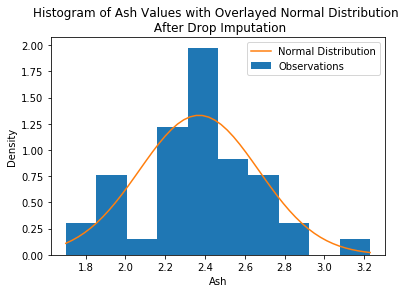

In [15]:
from scipy.stats import norm
#plot histogram
plt.hist(wine_drop["Ash"], density=True, label = "Observations")

#fit normal dist
m_drop, s_drop = norm.fit(wine_drop["Ash"])

#plot normal dist
x_values = np.linspace(min(wine_drop["Ash"]), max(wine_drop["Ash"]), 50)
p = norm.pdf(x_values, m_drop, s_drop)
plt.plot(x_values, p, label = "Normal Distribution")

#format figure
plt.xlabel("Ash")
plt.ylabel("Density")
plt.title("Histogram of Ash Values with Overlayed Normal Distribution \n After Drop Imputation")
plt.legend()
plt.show()

In [16]:
print("The Ash feature in the drop imputed dataset has mean %f and standard deviation %f" % (m_drop, s_drop))

The Ash feature in the drop imputed dataset has mean 2.369767 and standard deviation 0.299686


In [17]:
wine_mean = wine_df.copy()
for clm in wine_df:
    wine_mean[clm] = wine_mean[clm].fillna(np.mean(wine_mean[clm]))
print("There are %i observations in the dataset after mean imputation" % len(wine_mean))

There are 178 observations in the dataset after mean imputation


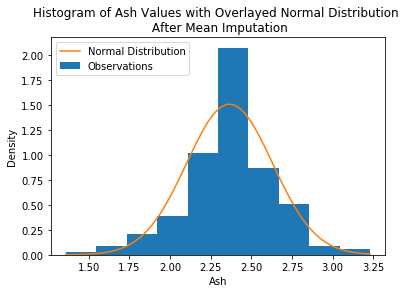

In [18]:
from scipy.stats import norm
#plot histogram
plt.hist(wine_mean["Ash"], density=True, label = "Observations")

#fit normal dist
m_mean, s_mean = norm.fit(wine_mean["Ash"])

#plot normal dist
x_values = np.linspace(min(wine_mean["Ash"]), max(wine_mean["Ash"]), 50)
p = norm.pdf(x_values, m_mean, s_mean)
plt.plot(x_values, p, label = "Normal Distribution")

#format figure
plt.xlabel("Ash")
plt.ylabel("Density")
plt.title("Histogram of Ash Values with Overlayed Normal Distribution \n After Mean Imputation")
plt.legend()
plt.show()

In [19]:
print("The Ash feature in the mean imputed dataset has mean %f and standard deviation %f" % (m_mean, s_mean))

The Ash feature in the mean imputed dataset has mean 2.366218 and standard deviation 0.264276


Drop and mean imputations do not change the mean of the dataset. Mean imputation does, however, decrease the standard deviation when compared with drop imputation.

## Part 3: Walk Softly and Carry a Broken Stick  

**Some Coding required**

3.1  A well-known probability problem, the **Broken Stick Problem** can be formulated as follows. *A stick is broken up at two points, chosen at random along its
length. Show that the probability that the pieces obtained form a triangle is 1/4.*  Write a function `simulate_broken_stick` that runs takes an integer parameter `n_sims`, runs that many simulations of the broken stick problem and returns a floating point number representing an estimate of the probability that the pieces of a stick randomly broken in two places form a triangle.  

**Hints**:

1. Use either np.random.rand or scipy.stats.uniform.rvs to simulate stick-breaking
2. Think about the triangle inequality

3.2 Run your function `simulate_broken_stick` with `n_sims` set to be equal to 50 and 1000.  What are your two estimates of the solution to the broken stick problem?

3.3 (Optional) Provide an analytic proof of the **Broken Stick Problem**.

**Hints**:

1. There's a very nice geometric proof taking advantage of [Viviani's Theorem][1].  Argue that every point in the equilateral triangle with height equal to the length of the stick maps to a particular breaking of the stick.  Divide the equilateral triangle into subtriangles by joining the midpoints.  What does it mean for a point to be outside the central equilateral subtriangle?
2. There's a more straightforward proof treating the breaking of the stick as joint uniform random variables.  What conditions does the triangle inequality impose on the joint random variable? How do you calculate the probability that the joint uniform meets those conditions? 

[1]: https://en.wikipedia.org/wiki/Viviani%27s_theorem

**Solution**:

<h4> 3.1  A well-known probability problem, the **Broken Stick Problem** can be formulated as follows. *A stick is broken up at two points, chosen at random along its
length. Show that the probability that the pieces obtained form a triangle is 1/4.*  Write a function `simulate_broken_stick` that runs takes an integer parameter `n_sims`, runs that many simulations of the broken stick problem and returns a floating point number representing an estimate of the probability that the pieces of a stick randomly broken in two places form a triangle.</h4>

In [38]:
def simulate_broken_stick(n_sims):
    
    # define your probability estimate and initialize it to 0
    probability_estimate = 0
    
    # run your simulation and calculate probability_estimate
    cuts = np.random.rand(n_sims, 2)
    cuts.sort()
    side1_less_than_half = cuts[:,0] < .5
    side2_less_than_half = cuts[:,1] - cuts[:,0] < .5
    side3_less_than_half = cuts[:,1] > .5
    triangles = np.all([side1_less_than_half, side2_less_than_half, side3_less_than_half], axis = 0)    # 
    total_triangles = np.sum(triangles)
    probability_estimate = total_triangles/n_sims
    return probability_estimate

<h4>3.2 Run your function `simulate_broken_stick` with `n_sims` set to be equal to 50 and 1000.  What are your two estimates of the solution to the broken stick problem?</h4>

In [39]:
estimate_50 = simulate_broken_stick(n_sims=50)  # calculate estimate for 50 simulations
estimate_1000 = simulate_broken_stick(n_sims=1000)  # calculate estimate for 1000 simulations

In [40]:
## Make sure you present your answers somewhere here
print("After 50 simulations, the estimated probability that the sticks form a triangle is %f" % estimate_50)
print("After 1000 simulations, the estimated probability that the sticks form a triangle is %f" % estimate_1000)

After 50 simulations, the estimated probability that the sticks form a triangle is 0.220000
After 1000 simulations, the estimated probability that the sticks form a triangle is 0.266000


<h4>3.3 (Optional) Provide an analytic proof of the **Broken Stick Problem**.</h4>

<div class="answer">

<br>
By the triangle inequality, we can see that the 3 sticks form a triangle if and only they are all of length less than 1/2. We can draw a 1x1 plot representing the multivariate distribution of two uniform random variables that take on values between 0 and 1 (i.e. the two breaks in the stick). Since we can't have the distance between the points or to the edge of the stick greater than a half, we can shade in the regions that would create a triangle (see figure). The shaded areas consist of two right angle triangles that, together, make up 1/4 of the square.
<br>

</div>

Text(0,0.5,'cut 2')

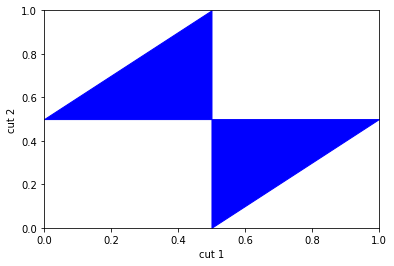

In [45]:
x = (0, .5)
y1 = (.5, 1)
y2 = (.5, .5)
plt.fill_between(x, y1, y2, color = "blue", interpolate=True)
x = (.5, 1)
y2 = (0, .5)
y1 = (.5, .5)

plt.fill_between(x, y1, y2, color = "blue", interpolate=True)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('cut 1')
plt.ylabel('cut 2')